In [32]:
from tensorflow.keras.layers import Lambda,Input,Dense,Flatten

In [33]:
from tensorflow.keras.models import Model 

In [34]:
from keras.applications.vgg16 import VGG16

In [35]:
from keras.applications.vgg16  import preprocess_input 

In [36]:
from keras.preprocessing import image

In [37]:
from keras.models import Sequential

In [38]:
from keras.preprocessing.image import ImageDataGenerator

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [40]:
image_size=[224,224]
train='C:/Users/vknsr/Downloads/training'
test='C:/Users/vknsr/Downloads/testing'

In [41]:
# we r not performing training so we are taking weights from imagenet include_top is remove output layer
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

In [42]:
for layer in vgg.layers:
    layer.trainable=False

In [45]:
folders=glob('C:/Users/vknsr/Downloads/training/*')

In [46]:
folders

['C:/Users/vknsr/Downloads/training\\cat',
 'C:/Users/vknsr/Downloads/training\\dog']

In [47]:
x=Flatten()(vgg.output)

In [51]:
prediction=Dense(len(folders),activation='sigmoid')(x)

In [50]:
model=Model(inputs=vgg.input,outputs=prediction)

In [52]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [56]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True)

In [60]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [61]:
training_set=train_datagen.flow_from_directory('C:/Users/vknsr/Downloads/training',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 30 images belonging to 2 classes.


In [63]:
test_set=test_datagen.flow_from_directory('C:/Users/vknsr/Downloads/testing',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 10 images belonging to 2 classes.


In [66]:
vgg16=model.fit_generator(training_set,epochs=10,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set))

<ipython-input-66-a995408755ba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  vgg16=model.fit_generator(training_set,epochs=10,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/10
1/1 [==============================] - 8s 8s/step - loss: 0.0266 - accuracy: 1.0000 - val_loss: 0.4907 - val_accuracy: 0.9000
Epoch 2/10
1/1 [==============================] - 8s 8s/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 0.4834 - val_accuracy: 0.9000
Epoch 3/10
1/1 [==============================] - 9s 9s/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.4801 - val_accuracy: 0.9000
Epoch 4/10
1/1 [==============================] - 9s 9s/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.4808 - val_accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 9s 9s/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.4851 - val_accuracy: 0.9000
Epoch 6/10
1/1 [==============================] - 8s 8s/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.4917 - val_accuracy: 0.9000
Epoch 7/10
1/1 [==============================] - 8s 8s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.4993 - val_accuracy: 0.9000
Epoch 8/10
1/1 [=========================

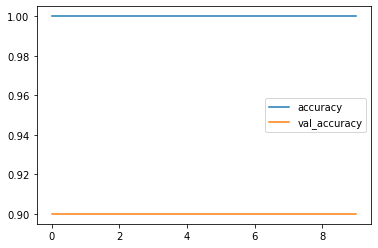

In [69]:
plt.plot(vgg16.history['accuracy'],label='accuracy')
plt.plot(vgg16.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

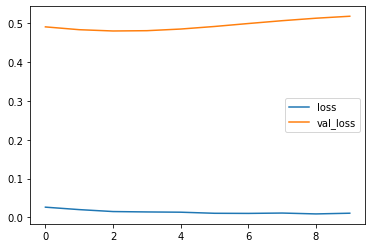

In [71]:
plt.plot(vgg16.history['loss'],label='loss')
plt.plot(vgg16.history['val_loss'],label='val_loss')
plt.legend()
plt.show()